In [1]:
import PIL
import cv2

In [ ]:
print(cv2.__version__, cv2.__spec__)
print(cv2.getBuildInformation())

In [3]:
PIL.__version__, PIL.__spec__

('4.3.0',
 ModuleSpec(name='PIL', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f4c2b87aeb8>, origin='/home/maddoxw/.virtualenvs/py36/lib/python3.6/site-packages/PIL/__init__.py', submodule_search_locations=['/home/maddoxw/.virtualenvs/py36/lib/python3.6/site-packages/PIL']))

In [4]:
!cat /proc/cpuinfo | egrep "model name"

model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name	: Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
model name

In [5]:
!lsblk -o name,rota,type,mountpoint

NAME   ROTA TYPE MOUNTPOINT
sda       0 disk 
├─sda1    0 part /
├─sda2    0 part 
└─sda5    0 part [SWAP]
sdb       0 disk 
├─sdb1    0 part /media/OSM_main_data
└─sdb2    0 part /media/OSM_slim_data
sdc       0 disk 
├─sdc1    0 part /media/OSM_main_index
└─sdc2    0 part /media/OSM_slim_index
sdd       1 disk 
└─sdd1    1 part /media/Borg_LS
sr0       1 rom  


In [22]:
import os
this_path = os.path.dirname('.')

INPUT_PATH = os.path.abspath(os.path.join(this_path, 'input'))
TRAIN_DATA = os.path.join(INPUT_PATH, "train")
TRAIN_DATA = "/media/Borg_LS/DATA/geos/airbus/input/train"
from glob import glob
filenames = glob(os.path.join(TRAIN_DATA, "*.jpg"))
len(filenames)

104070

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
import numpy as np
from PIL import Image, ImageOps

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.
/home/maddoxw/.virtualenvs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [17]:
def pil_open(filename):
    img = Image.open(filename)
    return np.asarray(img)

def cv2_open(filename):
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def ker_open(filename):
    img = load_img(filename)
    img = img_to_array(img)
    return np.array(img, "uint8")

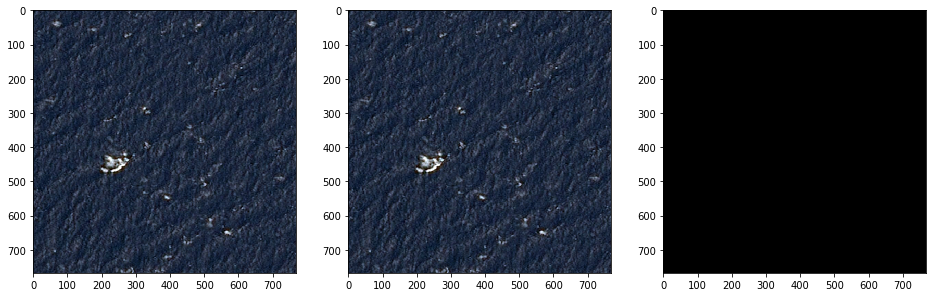

In [19]:
f = filenames[0]
r1 = pil_open(f) 
r2 = cv2_open(f)
r3 = ker_open(f)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r3)
plt.subplot(132)
plt.imshow(r1)
plt.subplot(133)
plt.imshow(np.abs(r3 - r1))

In [20]:
type(r1), type(r2), type(r3)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [23]:
%timeit -n5 -r3 [pil_open(f) for f in filenames[:100]]

849 ms ± 22.3 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [24]:
%timeit -n5 -r3 [cv2_open(f) for f in filenames[:100]]

612 ms ± 23.4 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [25]:
%timeit -n5 -r3 [ker_open(f) for f in filenames[:100]]

1.02 s ± 29 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [9]:
def stage_1_PIL(filename):
    img = Image.open(filename)
    img = ImageOps.box_blur(img, radius=1)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img)

def stage_1_cv2(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img

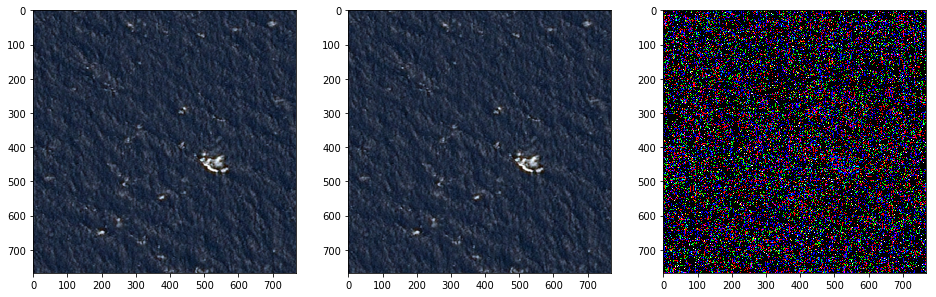

In [10]:
f = filenames[0]
r1 = stage_1_PIL(f) 
r2 = stage_1_cv2(f)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r1)
plt.subplot(132)
plt.imshow(r2)
plt.subplot(133)
plt.imshow(np.abs(r1 - r2))

In [11]:
%timeit -n5 -r3 [stage_1_PIL(f) for f in filenames[:100]]

2.04 s ± 8.17 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [12]:
%timeit -n5 -r3 [stage_1_cv2(f) for f in filenames[:100]]

931 ms ± 42.7 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [9]:
def stage_1b_PIL(img):
    img = ImageOps.box_blur(img, radius=1)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img)

def stage_1b_cv2(img):    
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img

In [13]:
imgs_PIL = [Image.open(f) for f in filenames[:100]]

In [11]:
imgs_cv2 = [cv2_open(f) for f in filenames[:100]]

In [14]:
%timeit -n5 -r3 [stage_1b_PIL(img) for img in imgs_PIL]

1.24 s ± 101 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [15]:
%timeit -n5 -r3 [stage_1b_cv2(img) for img in imgs_cv2]

382 ms ± 8.14 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [18]:
import numpy as np
from PIL import Image, ImageOps


def stage_2_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = img_pil.resize((512, 512), Image.CUBIC)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    img_pil = img_pil.transpose(Image.FLIP_TOP_BOTTOM)
    return np.asarray(img_pil)

def stage_2_cv2(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    img = cv2.flip(img, flipCode=1)
    img = cv2.flip(img, flipCode=0)
    return img

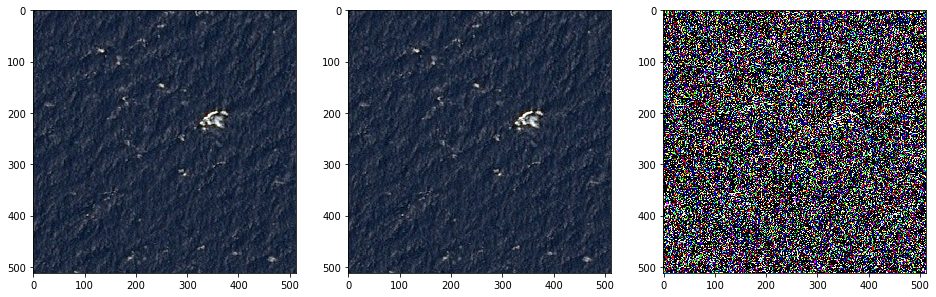

In [19]:
f = filenames[0]
r1 = stage_2_PIL(f) 
r2 = stage_2_cv2(f)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r1)
plt.subplot(132)
plt.imshow(r2)
plt.subplot(133)
plt.imshow(np.abs(r1 - r2))

In [22]:
%timeit -n5 -r3 [stage_2_PIL(f) for f in filenames[:200]]

3.28 s ± 33.2 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [23]:
%timeit -n5 -r3 [stage_2_cv2(f) for f in filenames[:200]]

1.96 s ± 116 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
